In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-and-directors-dataset-for-film-analytics/directors.csv
/kaggle/input/movies-and-directors-dataset-for-film-analytics/movies.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Movies

In [3]:
df=pd.read_csv("/kaggle/input/movies-and-directors-dataset-for-film-analytics/movies.csv")
df.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1465 non-null   int64  
 1   id            1465 non-null   int64  
 2   budget        1465 non-null   int64  
 3   popularity    1465 non-null   int64  
 4   revenue       1465 non-null   int64  
 5   title         1465 non-null   object 
 6   vote_average  1465 non-null   float64
 7   vote_count    1465 non-null   int64  
 8   director_id   1465 non-null   int64  
 9   year          1465 non-null   int64  
 10  month         1465 non-null   object 
 11  day           1465 non-null   object 
dtypes: float64(1), int64(8), object(3)
memory usage: 137.5+ KB


In [5]:
df.isnull().mean()

Unnamed: 0      0.0
id              0.0
budget          0.0
popularity      0.0
revenue         0.0
title           0.0
vote_average    0.0
vote_count      0.0
director_id     0.0
year            0.0
month           0.0
day             0.0
dtype: float64

In [6]:
df=df.drop(columns="Unnamed: 0")

## Descriptive analysis

In [7]:
df.describe()

,id,budget,popularity,revenue,vote_average,vote_count,director_id,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,5040.192491,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,258.059631,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,4762.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,4845.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,4964.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,5179.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,6204.000000,2016.000000


* **Year Range:** The movie dataset spans from 1976 to 2016, providing insights into a 40-year period of movie releases.

* **Vote Count:** The minimum number of votes received by a movie is 1, while the maximum is 13,752, indicating a wide disparity in audience engagement.

* **Vote Average:** Movies in the dataset have an average vote rating of 6.4, with a minimum vote average of 3.0 and a maximum of 8.3, showcasing the diversity in movie ratings.

* **Revenue:** The maximum revenue generated by a single movie is 2.79 billion dollars, while the lowest recorded revenue is zero, indicating that some movies did not generate measurable revenue.

* **Popularity**: The popularity score of movies ranges from 0 to 724, showing that some movies have significantly higher audience interest and engagement compared to others. 

* **Budget**: Movie budgets vary significantly, with the lowest budget being zero and the highest recorded budget being 380 million dollars. 

In [8]:
Le=LabelEncoder()

In [9]:
df['day']=Le.fit_transform(df['day'])
df['month']=Le.fit_transform(df['month'])
df['year']=Le.fit_transform(df['year'])

In [10]:
data=df.drop(columns="title")

## Correlation analysis

<Axes: >

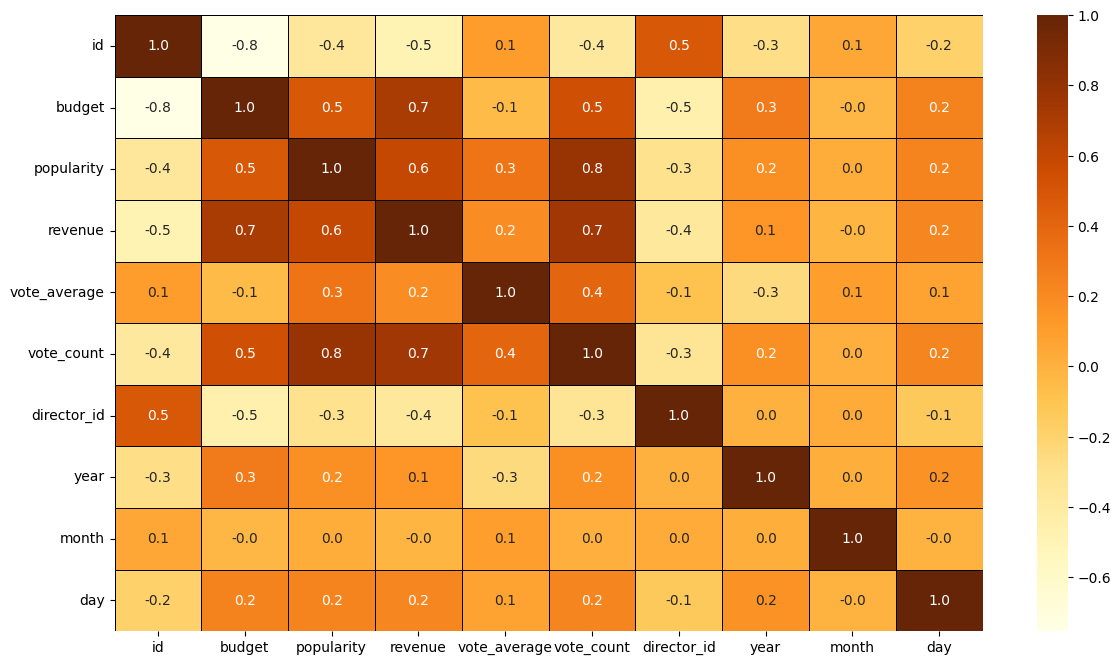

In [11]:
corr=data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,cmap="YlOrBr",linewidths=0.6,fmt=".1f",linecolor="black",annot=True)

**Budget & Revenue:**
Strong positive correlation (0.7). This indicates that movies with higher budgets tend to generate more revenue.

**Popularity & Vote Count:**
Very strong correlation (0.8). More popular movies tend to receive more votes.

**Revenue & Popularity:**
Positive correlation (0.6). Movies that are popular also tend to generate more revenue, as more people are likely to watch them.

**Budget & Popularity:**
Positive correlation (0.5). Higher-budget movies tend to be more popular, which can be due to factors like marketing spend and production quality.

**Vote Count & Revenue:**
Positive correlation (0.7). Movies that generate more revenue also receive more votes, likely because they are seen by more people.

**Vote Average:**
Weak positive correlation with most variables. The average vote score doesn’t seem strongly influenced by factors like budget or revenue, implying that high-budget or high-revenue films don't always have higher average ratings.
Director ID & Budget:

**Negative correlation (-0.5)**, it suggests that movies from certain directors may have lower budgets


In [12]:
print(df['year'].unique())


[33 31 39 36 40 30 32 37 35 38 34 29 21 28 23 19 25 27 26 22 14 24 15 18
 20 17  6 16 13  2  8 11 10 12  3  9  5  7  4  0  1]


In [13]:
print(df['year'].min(), df['year'].max())



0 40


## Revenue Vs Year

In [14]:
yearly_rev=df.groupby("year")['revenue'].mean()
yearly_rev=yearly_rev.reset_index()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


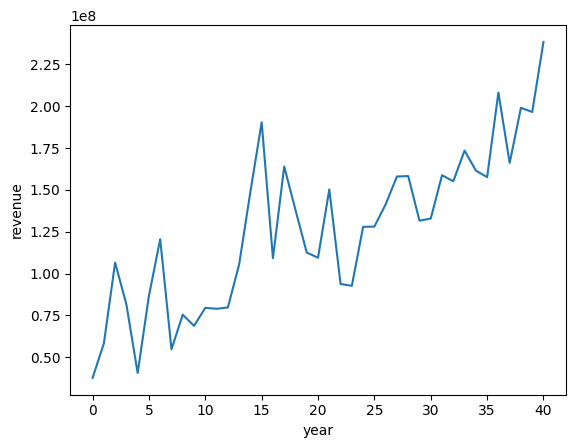

In [15]:
sns.lineplot(yearly_rev,x='year',y='revenue')
plt.show()

* Shows revenue over time (years) indicating a clear upward trend. As the years progress, movie revenues tend to increase.
* Several notable peaks suggest that certain years had blockbuster movies generating significant revenue. This might be due to high-budget productions or successful franchises released during these periods.
* Although the trend is upward, there are also periods of volatility where revenues fluctuate significantly year to year.

## Popularity Vs Year

In [16]:
yearly_pop=df.groupby('year')['popularity'].mean()
yearly_pop=yearly_pop.reset_index()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


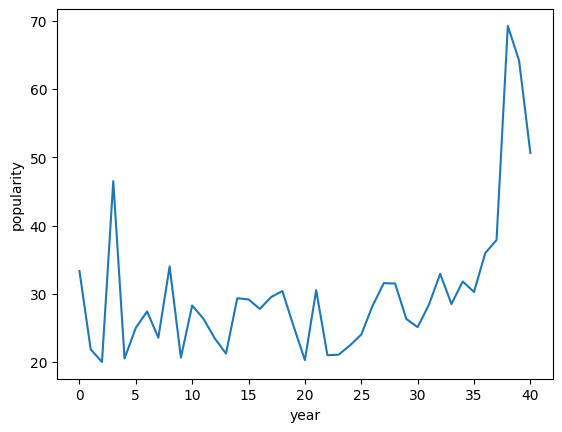

In [17]:
sns.lineplot(yearly_pop,x='year',y='popularity')
plt.show()

* In the beginning years, the graph shows quite a bit of fluctuation in popularity. This could suggest varying public interest or external factors affecting movie popularity.

* Toward the end (around year 40), there is a sharp spike in popularity. This likely indicates an increase in global movie consumption or popular releases driving higher popularity.

## Budget Vs Revenue

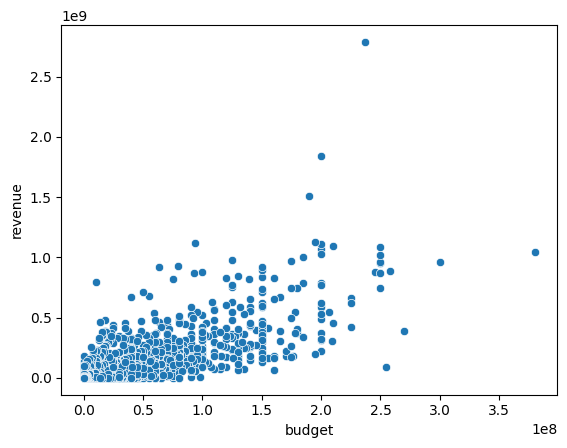

In [18]:
sns.scatterplot(df,x='budget',y='revenue')
plt.show()

* The scatter plot shows a positive correlation between budget and revenue. Generally, higher-budget movies tend to generate more revenue, but there are also several lower-budget films that perform well.
* Some movies with relatively low budgets also show a significant revenue generation, which indicates the presence of highly profitable, low-budget films.
* There are a few outlier points where movies with extremely high budgets lead to very high revenues, suggesting large-scale productions

# Directors

In [19]:
df_dir=pd.read_csv("/kaggle/input/movies-and-directors-dataset-for-film-analytics/directors.csv")
df_dir

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male
...,...,...,...,...
2344,2344,Shane Carruth,7106,Male
2345,2345,Neill Dela Llana,7107,NaN
2346,2346,Scott Smith,7108,NaN
2347,2347,Daniel Hsia,7109,Male


In [20]:
df_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2349 non-null   int64 
 1   director_name  2349 non-null   object
 2   id             2349 non-null   int64 
 3   gender         1724 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.5+ KB


In [21]:
df_dir=df_dir.drop(columns="Unnamed: 0")

## Filling null values

In [22]:
df_dir.isnull().mean()

director_name    0.000000
id               0.000000
gender           0.266071
dtype: float64

In [23]:
df_dir['gender']=df_dir['gender'].fillna(df_dir['gender'].mode()[0])

## Male Vs Female

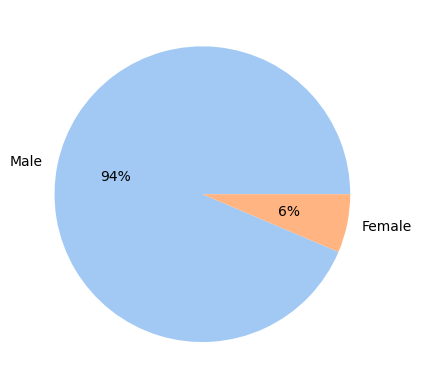

In [24]:
gender_counts = df_dir['gender'].value_counts()
gender_labels = gender_counts.index

palette_color = sns.color_palette('pastel')  
plt.pie(gender_counts, labels=gender_labels, colors=palette_color, autopct='%.0f%%')
plt.show() 

### Merging data

In [25]:
merged_df=pd.merge(df,df_dir,left_on='director_id', right_on='id',how='inner')
merged_df

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,33,2,4,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,31,8,2,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,39,10,1,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,36,5,1,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,31,8,5,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,2,8,1,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,18,11,5,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,33,1,0,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,14,5,0,Richard Linklater,5535,Male


In [26]:
merged_df=merged_df.rename(columns={'id_x':'movie_id'})

In [27]:
merged_df=merged_df.drop(columns='id_y')

In [28]:
merged_df

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,33,2,4,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,31,8,2,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,39,10,1,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,36,5,1,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,31,8,5,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,2,8,1,Martin Scorsese,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,18,11,5,Kevin Smith,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,33,1,0,Uwe Boll,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,14,5,0,Richard Linklater,Male


## Top Directors by vote count 

In [29]:
dv=merged_df.groupby("director_name")['vote_count'].mean()
dv=dv.reset_index()

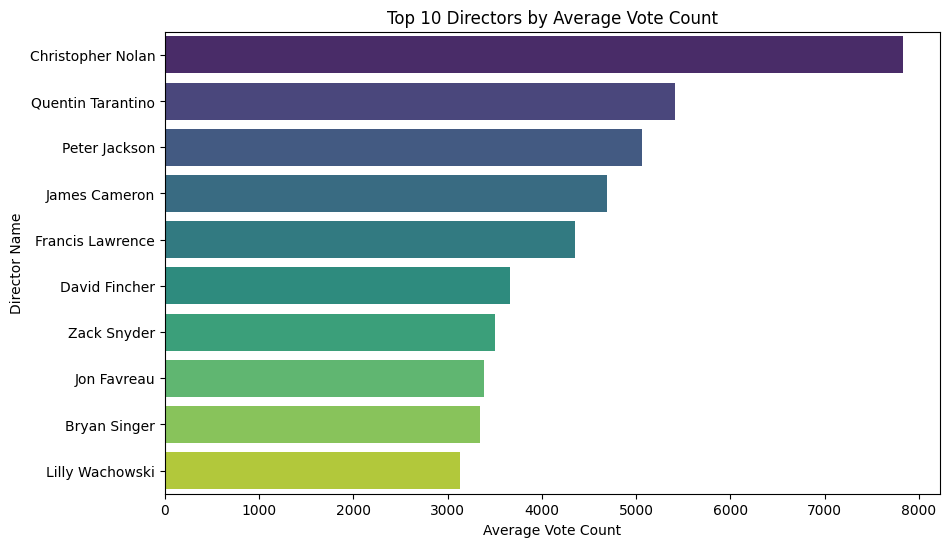

In [30]:
top_10_directors = dv.sort_values(by='vote_count', ascending=False).head(10)
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='vote_count', y='director_name', data=top_10_directors, palette="viridis")
plt.title('Top 10 Directors by Average Vote Count')
plt.xlabel('Average Vote Count')
plt.ylabel('Director Name')
plt.show()

## Gender wise sucess 

In [31]:
gender_analysis = merged_df.groupby('gender').agg({
    'vote_average': 'mean',
    'revenue': 'mean',
    'popularity': 'mean'
})
print(gender_analysis)

        vote_average       revenue  popularity
gender                                        
Female      6.262500  1.384982e+08   29.000000
Male        6.370551  1.433601e+08   30.897418


* There are small differences in vote averages, revenue, and popularity between films directed by men and women, with male-directed films performing slightly better on all metrics.
* The differences are not vast, suggesting that, when provided similar resources and opportunities, both male and female directors deliver comparable results in terms of ratings, revenue, and popularity.